In [1]:
import numpy as np
import sympy as sp

In [3]:
vs, sigma, R = sp.symbols('v_s sigma R')

lam = sp.symbols('lambda')

t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)


xs = vs * t  # since it's steady state
r = sp.sqrt((x - xs)**2 + y**2 + z**2)
f_r = (sp.tanh(sigma * (r + R)) - sp.tanh(sigma * (r - R))) / (2 * sp.tanh(sigma * R))

#metric components based on the line element
g_tt = -(1 - vs**2 * f_r**2)
g_tx = g_xt = -vs * f_r
g_xx = g_yy = g_zz = 1

#g_uv
metric = sp.Matrix([[g_tt, g_tx, 0, 0],
                    [g_xt, g_xx, 0, 0],
                    [0, 0, g_yy, 0],
                    [0, 0, 0, g_zz]])
display(metric)
# The inverse metric tensor g^uv (needed for Christoffel symbols)
metric_inv = metric.inv()

# defining a partial
def partial_derivative(matrix, var):
    """ This function returns the matrix of partial derivatives """
    return sp.Matrix(matrix.shape[0], matrix.shape[1], lambda i,j: sp.diff(matrix[i, j], var))

# derivatives of metric tensor
partial_t = partial_derivative(metric, t)
partial_x = partial_derivative(metric, x)
partial_y = partial_derivative(metric, y)
partial_z = partial_derivative(metric, z)

print("start computation")
# computing the symbols using the metric equation
christoffel_symbols = [[[0 for i in range(4)] for j in range(4)] for k in range(4)]
for lambda_ in range(4):
    for mu in range(4):
        for nu in range(4):
            christoffel_symbols[lambda_][mu][nu] = 1/2 * (
                metric_inv[lambda_, 0] * (partial_x[mu, nu] + partial_x[nu, mu] - partial_t[mu, nu]) +
                metric_inv[lambda_, 1] * (partial_t[mu, nu] + partial_t[nu, mu] - partial_x[mu, nu]) +
                metric_inv[lambda_, 2] * (partial_y[mu, nu] + partial_y[nu, mu] - partial_y[mu, nu]) +
                metric_inv[lambda_, 3] * (partial_z[mu, nu] + partial_z[nu, mu] - partial_z[mu, nu])
            ).simplify()
            print(f"l: {lambda_} mu: {mu} nu{nu}")
            print(christoffel_symbols[lambda_][mu][nu])

C = christoffel_symbols

Matrix([
[v_s**2*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))**2/(4*tanh(R*sigma)**2) - 1, -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)), 0, 0],
[            -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)),                                                                                                                                                                                                        1, 0, 0],
[                                                                                                                                              

start computation
l: 0 mu: 0 nu0
-0.125*sigma*v_s**2*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))))**2 - 2*(v_s + 2)*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))*tanh(R*sigma))*(tanh(sigma*(R - sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2 - tanh(sigma*(R + sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)))**2)/(sqrt((v_s*t(lambda) - x(lambda))**2 + y(lambda)**2 + z(lambda)**2)*tanh(R*sigma)**3)
l: 0 mu: 0 nu1
0.125*sigma*v_s*(v_s*t(lambda) - x(lambda))*(v_s*(2*v_s + 1)*(tanh(sigma*(R - sqrt(v_s**2*t(lambda)**2 - 2*v_s*t(lambda)*x(lambda) + x(lambda)**2 + y(lambda)**2 + z(lambda)**2))

In [5]:
pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)
Ct, Cx, Cy =C[0], C[1], C[2]
dptdl=-1*(Ct[0][0]*pt**2+Ct[1][1]*px**2+2*Ct[0][1]*pt*px+2*Ct[0][2]*pt*py+2*Ct[1][2]*px*py)
dpxdl=-1*(Cx[0][0]*pt**2+Cx[1][1]*px**2+2*Cx[0][1]*pt*px+2*Cx[0][2]*pt*py+2*Cx[1][2]*px*py)
dpydl=-1*(Cy[0][0]*pt**2+2*Cy[0][1]*pt*px)

In [51]:
dt = sp.diff(t, lam)
dx = sp.diff(x, lam)
dy = sp.diff(y, lam)
dz = sp.diff(z, lam)

v_s, sigma, R = sp.symbols('v_s sigma R')

# define constants
sigma_val = 1
vs_val=3
R_val=2

def evaluate(eq, POS, VEL):
    [t_val, x_val, y_val]=POS
    [dt_val, dx_val, dy_val]=VEL
    substitutions = {
        t: t_val,
        x: x_val,
        y: y_val,
        z: 0,
        dt: dt_val,
        dx: dx_val,
        dy: dy_val,
        dz: 0,
        sigma: sigma_val,
        v_s: vs_val,
        R: R_val
    }

    # Perform substitutions
    result = eq.subs(substitutions)
    result = result.evalf()
    return result

# dLambda
dL=0.1
length = 100
angles=[0.0 + (i/length)*2*np.pi for i in range(length)]
# define initial conditions

geods=[]
Counter = 0

for theta_0 in angles:
    L=0
    pos=[1, 0, 0] #[t, x, y]
    vel=[1, np.cos(theta_0)+vs_val, np.sin(theta_0)] #[t',x',y']
    acc=[0, 0, 0] #[t'',x'',y'']

    geod = {
        L: [pos, vel, acc]
    }

    # set up recursion

    for i in range(300):
        L_=L
        L+=dL
        dp=[
            evaluate(dptdl, pos, vel),
            evaluate(dpxdl, pos, vel),
            evaluate(dpydl, pos, vel)
        ]
        p=[
            geod[L_][1][0]+dp[0]*dL,
            geod[L_][1][1]+dp[1]*dL,
            geod[L_][1][2]+dp[2]*dL
        ]
        a=[
            geod[L_][0][0]+p[0]*dL,
            geod[L_][0][1]+p[1]*dL,
            geod[L_][0][2]+p[2]*dL
        ]
        geod[L]=[a,p,dp]
    Counter+=1
    print(Counter)
    geods.append(geod)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


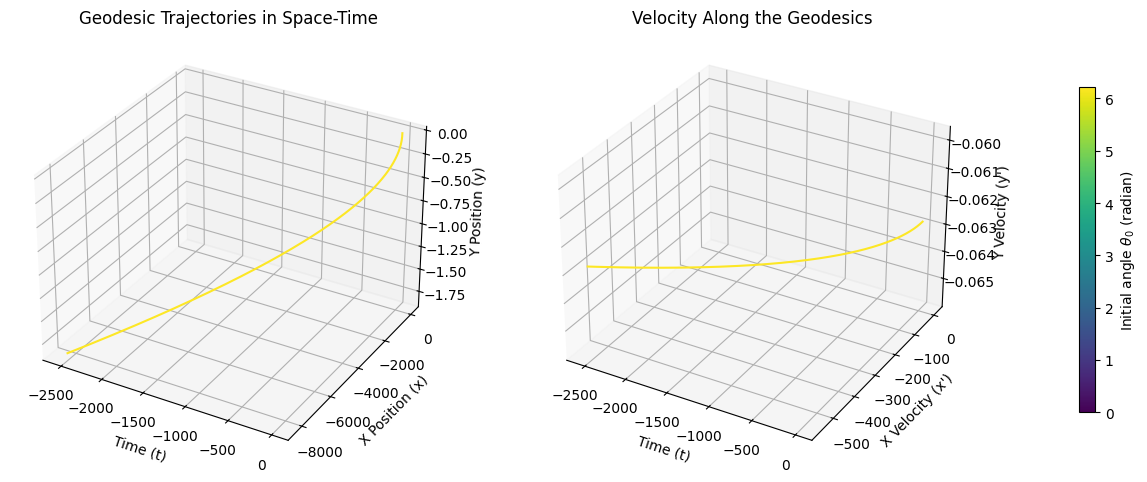

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import ListedColormap, Normalize
from matplotlib.colorbar import ColorbarBase

fig = plt.figure(figsize=(14, 7))

# Create a new subplot for position
ax = fig.add_subplot(121, projection='3d')
ax.set_xlabel('Time (t)')
ax.set_ylabel('X Position (x)')
ax.set_zlabel('Y Position (y)')
ax.set_title('Geodesic Trajectories in Space-Time')

# Create a new subplot for velocity
ax2 = fig.add_subplot(122, projection='3d')
ax2.set_xlabel('Time (t)')
ax2.set_ylabel("X Velocity (x')")
ax2.set_zlabel("Y Velocity (y')")
ax2.set_title("Velocity Along the Geodesics")

# Normalize for the color map to correspond to the range of theta_0
norm = Normalize(vmin=np.min(angles), vmax=np.max(angles))

# Generate a color map ranging from 0 to 1 over the number of geodesics
colors = cm.viridis(norm(angles))

a = 99
b = 99
# Plotting each geodesic with its corresponding color
for i, (geod, color) in enumerate(zip(geods, colors)):
  if i >= a and i <= b:
    lambdas = list(geod.keys())
    positions = [geod[key][0] for key in lambdas]
    velocities = [geod[key][1] for key in lambdas]
    ts, xs, ys = zip(*positions)
    tps, xps, yps = zip(*velocities)

    # Position plot
    ax.plot(ts, xs, ys, color=color)

    # Velocity plot
    ax2.plot(ts, xps, yps, color=color)

# Create a colorbar as a legend
sm = cm.ScalarMappable(cmap=cm.viridis, norm=norm)
sm.set_array([])  # Dummy array for the colorbar

# Add colorbar to the figure
cbar = fig.colorbar(sm, ax=[ax, ax2], orientation='vertical', fraction=0.015, pad=0.1)
cbar.set_label('Initial angle $\\theta_0$ (radian)')

plt.show()

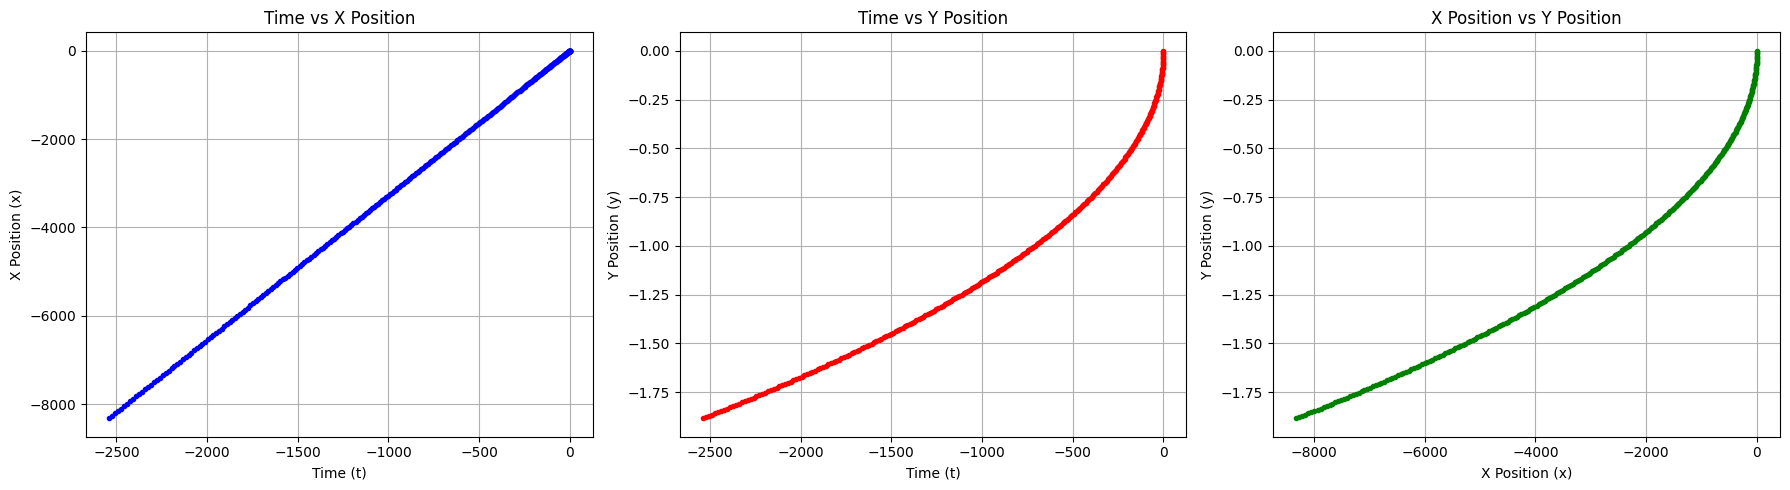

In [59]:
# Creating 2D plots for t-x, t-y, and x-y
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns

# t-x plot
ax1.plot(ts, xs, 'b.-')  # 'b.-' is the style: blue line with dots
ax1.set_xlabel('Time (t)')
ax1.set_ylabel('X Position (x)')
ax1.set_title('Time vs X Position')
ax1.grid(True)

# t-y plot
ax2.plot(ts, ys, 'r.-')  # 'r.-' is the style: red line with dots
ax2.set_xlabel('Time (t)')
ax2.set_ylabel('Y Position (y)')
ax2.set_title('Time vs Y Position')
ax2.grid(True)

# x-y plot
ax3.plot(xs, ys, 'g.-')  # 'g.-' is the style: green line with dots
ax3.set_xlabel('X Position (x)')
ax3.set_ylabel('Y Position (y)')
ax3.set_title('X Position vs Y Position')
ax3.grid(True)

# Display the plots next to each other
plt.tight_layout()
plt.show()


length = 100
angles=[0.0 * (i/length)*2*np.pi for i in range(length)]

In [48]:

length = 100
angles=[0.0 + (i/length)*2*np.pi for i in range(length)]
for i in  angles:
  print(i)

0.0
0.06283185307179587
0.12566370614359174
0.18849555921538758
0.25132741228718347
0.3141592653589793
0.37699111843077515
0.4398229715025711
0.5026548245743669
0.5654866776461628
0.6283185307179586
0.6911503837897545
0.7539822368615503
0.8168140899333463
0.8796459430051422
0.9424777960769379
1.0053096491487339
1.0681415022205298
1.1309733552923256
1.1938052083641213
1.2566370614359172
1.319468914507713
1.382300767579509
1.4451326206513049
1.5079644737231006
1.5707963267948966
1.6336281798666925
1.6964600329384885
1.7592918860102844
1.82212373908208
1.8849555921538759
1.9477874452256718
2.0106192982974678
2.0734511513692637
2.1362830044410597
2.199114857512855
2.261946710584651
2.324778563656447
2.3876104167282426
2.4504422698000385
2.5132741228718345
2.57610597594363
2.638937829015426
2.701769682087222
2.764601535159018
2.827433388230814
2.8902652413026098
2.9530970943744053
3.015928947446201
3.078760800517997
3.141592653589793
3.204424506661589
3.267256359733385
3.330088212805181
3.3

In [50]:
test2 = np.linspace(0, 2*np.pi, 100)
test2

array([0.        , 0.06346652, 0.12693304, 0.19039955, 0.25386607,
       0.31733259, 0.38079911, 0.44426563, 0.50773215, 0.57119866,
       0.63466518, 0.6981317 , 0.76159822, 0.82506474, 0.88853126,
       0.95199777, 1.01546429, 1.07893081, 1.14239733, 1.20586385,
       1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652